In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import numpy as np

def plot_TransitionMatrix(data):
    """
    绘制1 行 2 列的子图，一个子图对应一个数据集，展示不同数据集在不同参数 k 取值下的多个模型性能指标（准确率、召回率、RMSE）变化趋势

    参数：
    data:字典列表，每个字典代表 1 组实验数据，每个字典需包含 7个键：Dataset/k/acc/recall/Precision/mae/rmse

    配色：
    colors = {
        'acc': 'tab:blue',
        'recall': 'tab:green',
        'Precision': 'tab:orange',
        'mae': 'tab:red',
        'rmse': '#6A84B7'
    }
    """
    
    # 设置字体为Times New Roman
    matplotlib.rcParams['font.family'] = 'Times New Roman'
    
    df = pd.DataFrame(data)
    
    # 设置seaborn样式
    sns.set_style("ticks")
    
    # 定义颜色
    colors = {
        'acc': 'tab:blue',
        'recall': 'tab:green',
        'Precision': 'tab:orange',
        'mae': 'tab:red',
        'rmse': '#6A84B7'
    }
    
    # 获取所有唯一的数据集
    datasets = df['Dataset'].unique()
    
    # 创建PDF文件
    with PdfPages('performance_metrics.pdf') as pdf:
        # 创建一个包含两个子图的图形
        fig = plt.figure(figsize=(16, 6))
    
        # 绘制 'chengdu' 数据
        ax1 = plt.subplot(1, 2, 1)
        subset_chengdu = df[df['Dataset'] == 'chengdu'].sort_values('k')
        x = np.arange(len(subset_chengdu))
        bar_width = 0.6
    
        # 右轴绘制 RMSE 柱状图
        ax1_right = ax1.twinx()
        rmse_values = subset_chengdu['rmse']
        bars1 = ax1_right.bar(x, rmse_values, width=bar_width, label='RMSE', color=colors['rmse'], zorder=1, alpha=0.7, hatch='//')
    
        # 在柱子顶端添加点
        ax1_right.scatter(x, rmse_values, color=colors['rmse'], s=50, zorder=2)
    
        # 左轴绘制 ACC 和 Recall 折线图
        ax1.plot(x, subset_chengdu['acc'], label='ACC', color=colors['acc'], linewidth=4, marker='o', markersize=15, zorder=5)
        ax1.plot(x, subset_chengdu['recall'], label='Recall', color=colors['recall'], linewidth=4, marker='s', markersize=15, zorder=5)
    
        # 设置 y 轴范围
        ax1.set_ylim(0.72, 0.81)
        ax1_right.set_ylim(750, 820)
    
        # 设置标签和刻度
        ax1.set_xlabel('Chengdu', fontsize=22, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(subset_chengdu['k'], fontsize=22)
        ax1.tick_params(axis='both', which='major', labelsize=22)
        ax1_right.tick_params(axis='y', which='major', labelsize=22)
        ax1.set_ylabel('ACC, Recall', fontsize=22, fontweight='bold')
    
        # 图例
        lines1, labels1 = ax1.get_legend_handles_labels()
        bars1, labels2 = ax1_right.get_legend_handles_labels()
        ax1.legend(lines1 + bars1, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.15, 1.02), fontsize=18)
    
        # 绘制 'porto' 数据
        ax2 = plt.subplot(1, 2, 2)
        subset_porto = df[df['Dataset'] == 'porto'].sort_values('k')
        x = np.arange(len(subset_porto))
        ax2_right = ax2.twinx()
        rmse_values = subset_porto['rmse']
        bars2 = ax2_right.bar(x, rmse_values, width=bar_width, label='RMSE', color=colors['rmse'], zorder=1, alpha=0.7, hatch='//')
        ax2_right.scatter(x, rmse_values, color=colors['rmse'], s=50, zorder=2)
        ax2.plot(x, subset_porto['acc'], label='ACC', color=colors['acc'], linewidth=4, marker='o', markersize=15, zorder=5)
        ax2.plot(x, subset_porto['recall'], label='Recall', color=colors['recall'], linewidth=4, marker='s', markersize=15, zorder=5)
        ax2.set_ylim(0.57, 0.63)
        ax2_right.set_ylim(480, 530)
        ax2.set_xlabel('Porto', fontsize=22, fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels(subset_porto['k'], fontsize=22)
        ax2.tick_params(axis='both', which='major', labelsize=22)
        ax2_right.tick_params(axis='y', which='major', labelsize=22)
        ax2_right.set_ylabel('RMSE', fontsize=22, fontweight='bold')
        lines3, labels3 = ax2.get_legend_handles_labels()
        bars4, labels4 = ax2_right.get_legend_handles_labels()
        ax2.legend(lines3 + bars4, labels3 + labels4, loc='upper left', bbox_to_anchor=(0.15, 1.02), fontsize=18)
    
        # 调整子图间距
        plt.subplots_adjust(wspace=0.4)
    
        # 保存到PDF
        pdf.savefig(fig)
        plt.show()
        plt.close(fig)





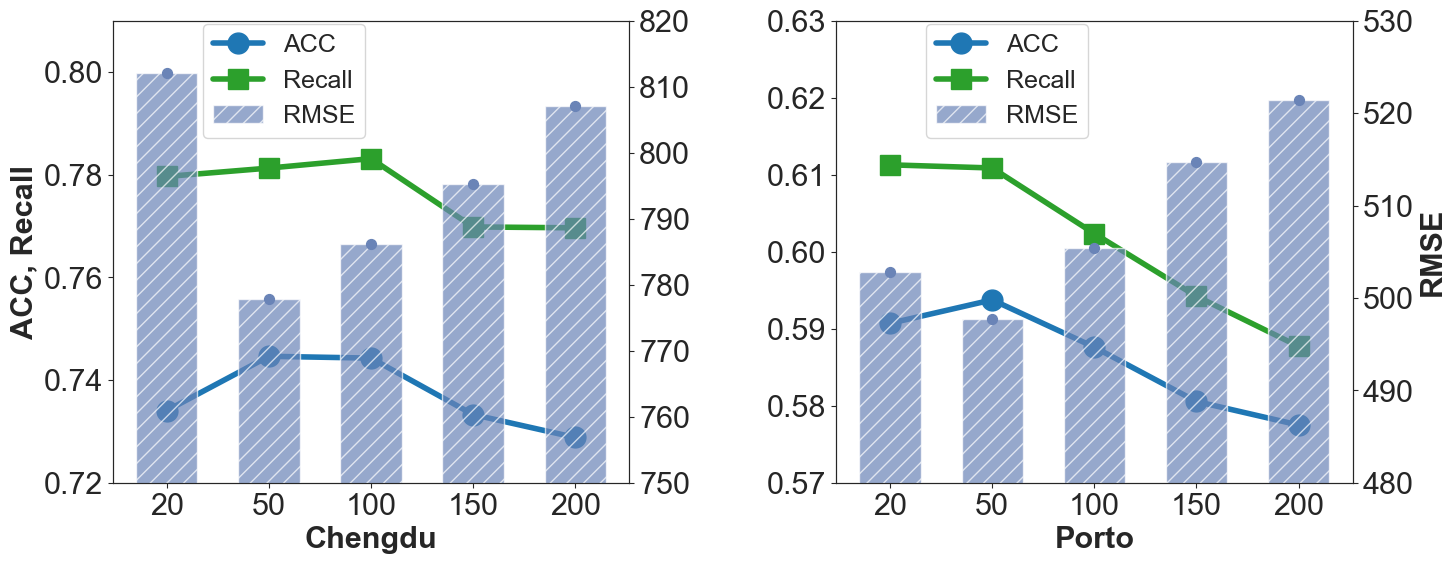

In [2]:
# 示例 
data = [
    {'Dataset': 'chengdu', 'k': 20, 'acc': 0.734047908670759, 'recall': 0.7796614986214137, 'Precision': 0.8304395440897889, 'mae': 244.72230763493477, 'rmse': 812.1071805350866},
    {'Dataset': 'chengdu', 'k': 50, 'acc': 0.744630285852712, 'recall': 0.7812930316586126, 'Precision': 0.8312635801005694, 'mae': 234.2732010884587, 'rmse': 777.8466439742521},
    {'Dataset': 'chengdu', 'k': 100, 'acc': 0.7442749556278015, 'recall': 0.7831363749908417, 'Precision': 0.8331092589003931, 'mae': 234.23931229703268, 'rmse': 786.163902636812},
    {'Dataset': 'chengdu', 'k': 150, 'acc': 0.7332839693326568, 'recall': 0.7698300328671874, 'Precision': 0.8296578079106316, 'mae': 245.73498661757756, 'rmse': 795.3208620527608},
    {'Dataset': 'chengdu', 'k': 200, 'acc': 0.7288139952050021, 'recall': 0.7696548669528234, 'Precision': 0.8295716780651564, 'mae': 250.8462869556323, 'rmse': 807.0392382358184},
    {'Dataset': 'porto', 'k': 20, 'acc': 0.5907030008720094, 'recall': 0.6112843474030443, 'Precision': 0.8197423624497744, 'mae': 211.6667120671557, 'rmse': 502.8107864177601},
    {'Dataset': 'porto', 'k': 50, 'acc': 0.5937479158281194, 'recall': 0.6108756418226239, 'Precision': 0.8203070840936205, 'mae': 209.11890064143188, 'rmse': 497.752870279849},
    {'Dataset': 'porto', 'k': 100, 'acc': 0.5876101161477897, 'recall': 0.6023625118309074, 'Precision': 0.818142466690533, 'mae': 214.99493827920708, 'rmse': 505.3812227659168},
    {'Dataset': 'porto', 'k': 150, 'acc': 0.580548857974882, 'recall': 0.5942170069279282, 'Precision': 0.8171400272303063, 'mae': 221.9738227142258, 'rmse': 514.7602017409732},
    {'Dataset': 'porto', 'k': 200, 'acc': 0.5774931392804196, 'recall': 0.587714157094047, 'Precision': 0.8180975059802181, 'mae': 226.246082824873, 'rmse': 521.4241754073912}
]
plot_TransitionMatrix(data)